<a href="https://colab.research.google.com/github/mrturizo/linear_regression/blob/main/Predicci%C3%B3n_de_precios_de_carros_Regresion_Lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica de Regresión Lineal Múltiple
### **Curso:** Fundamentos de Inteligencia Artificial (FIA)
### **Profesor:** Johann A. Ospina

In [ ]:
pip install seaborn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Cargar librerias
import pandas as pd
import numpy as np
import sklearn
import math 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy.linalg import inv 

**Ejemplo:** En un estudio sobre la población de un parásito se hizo un recuento de parásitos en 15 localizaciones con diversas condiciones
ambientales.

In [ ]:
#Cargar datos de csv
df = pd.read_csv(r'CarPrice_Assignment.csv')
print(df)
df.info()

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [ ]:
#filtrar dejando sólo variables cuantitativas
df._get_numeric_data()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
#guardar el filtro como nuevo dataframe
df2=df._get_numeric_data()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

In [ ]:
# eliminar columnas innecesarias para la matriz X
df3 = df2.drop(
    labels=["car_ID","price"], axis=1)

In [ ]:
#definir matriz X de variables
X = df3
print(X)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68            

In [ ]:
#definir matriz Y de valores de respuesta
Y = df2[['price']]
print(Y)

       price
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
..       ...
200  16845.0
201  19045.0
202  21485.0
203  22470.0
204  22625.0

[205 rows x 1 columns]


Text(0, 0.5, 'price')

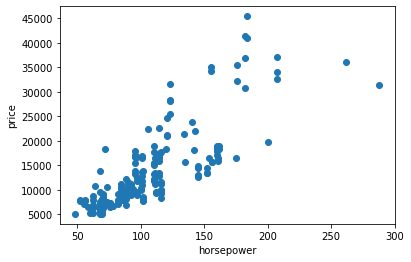

In [ ]:
#Diagrama de dispersión entre ...
plt.scatter(df2['horsepower'], df2['price'])
plt.xlabel('horsepower')
plt.ylabel('price')


Text(0, 0.5, 'price')

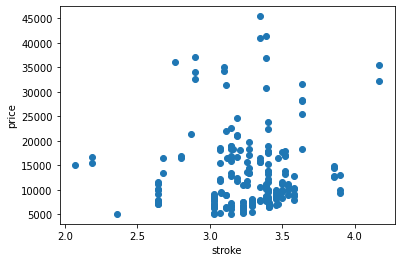

In [ ]:
#Diagrama de dispersión entre ...
plt.scatter(df2['stroke'], df['price'])
plt.xlabel('stroke')
plt.ylabel('price')

Text(0, 0.5, 'price')

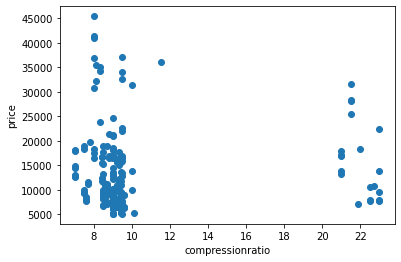

In [ ]:

#Diagrama de dispersión entre ...
plt.scatter(df2['compressionratio'], df['price'])
plt.xlabel('compressionratio')
plt.ylabel('price')


Text(0, 0.5, 'price')

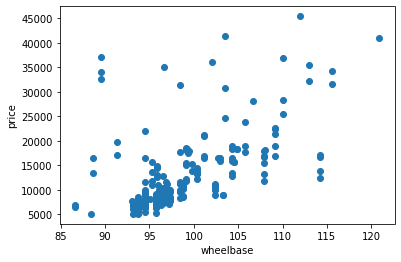

In [ ]:
#Diagrama de dispersión entre ...
plt.scatter(df2['wheelbase'], df['price'])
plt.xlabel('wheelbase')
plt.ylabel('price')



Text(0, 0.5, 'price')

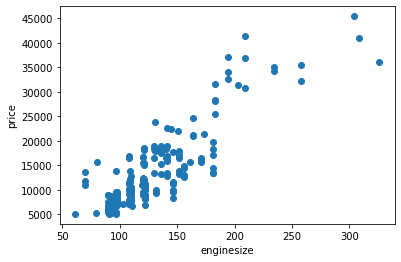

In [ ]:
#Diagrama de dispersión entre ...
plt.scatter(df2['enginesize'], df['price'])
plt.xlabel('enginesize')
plt.ylabel('price')

# Ajuste de un modelo de regresión lineal múltiple usando librerias

Pasos para el análisis de regresión múltiple:

1. Preparar los datos.
2. Análisis Exploratorio de Datos (AED).
3. Evaluar las correlaciones.
4. Ajuste del modelo con datos de entrenamiento.
5. Credibilidad del modelo con datos de prueba


**Tarea:** Realizar el AED.

In [ ]:
#2. Evaluar las correlaciones
matriz_corr = df2.corr()
matriz_corr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [ ]:
#Grafica de la matriz de correlaciones
sns.heatmap(matriz_corr, annot=True);

In [ ]:
#Importar métodos para regresión lineal de la libreria sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Definir el dataframe de variable predictoras y variable respuesta
X = df3
Y = df2['price']

In [ ]:
#Definir datos de entrenamiento y datos de prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
#3. Ajuste del modelo con datos de prueba
linear_model = LinearRegression().fit(x_train, y_train)

In [ ]:
print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))

Puntaje Entrenamiento:  0.8607127143445135


In [ ]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

stroke             -3590.172857
boreratio           -297.907488
citympg             -218.931730
carlength           -122.460640
curbweight             1.053520
peakrpm                2.542180
horsepower            22.646079
highwaympg            79.519521
carheight            102.625017
enginesize           116.973914
wheelbase            162.791053
symboling            284.588693
compressionratio     317.398186
carwidth             805.407978
dtype: float64


In [ ]:
y_pred = linear_model.predict(x_test)
y_pred

array([ 8540.75969554,  5251.65269938, 15442.06461719, 15322.56468222,
       14880.16266225,  9243.22328595, 15370.58208806, 13905.39839328,
        6185.13539689, 13358.20777831, 25692.34533149, 10051.49581467,
        9058.39128527, 16714.4398761 ,  5582.28406123,  6866.26603398,
        7927.55260027, 25862.72026326, 26626.23715607, 15060.09144855,
        9872.83565266,  6905.53099502,  8503.18004219, 15990.65306842,
        6521.26524655,  5685.36208505, 11998.27232475, 29403.6197722 ,
        8489.80326306, 10109.21866141, -1189.31769275,  9787.81317062,
       21678.49397644, 18036.88788675, 10035.6930086 , 46181.81660999,
        9213.49766086, 13260.8370333 ,  9323.34186301,  6761.91802773,
        6762.20284399,  9010.19535574, 25485.98547488,  5798.95108825,
        9810.67226581, 40248.83104256, 35125.56153179, 10579.54949874,
       25104.80353375, 14780.27218079,  5760.1367198 , 18094.83150901,
        5937.41991758, 18381.80001791, 10083.03389819,  9480.05633405,
      

In [ ]:
#y_pred
#print(type(y_pred))
#y_test = y_test.to_numpy() 
#print(type(y_test))
#print(y_test)

In [ ]:
#Importar métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8294996382967346


In [ ]:
from sklearn.metrics import mean_squared_error
ecm = mean_squared_error(y_test, y_pred)
print(ecm)

16508088.377185905


In [ ]:
#Raíz del Error Cuadrático Medio (RECM)
recm = math.sqrt(ecm)
print(recm)

4063.014690742073


In [ ]:
#Error Absoluto Medio
eam = mean_absolute_error(y_test, y_pred)
print(eam)

2833.2821390556282


Text(0, 0.5, 'Recuento')

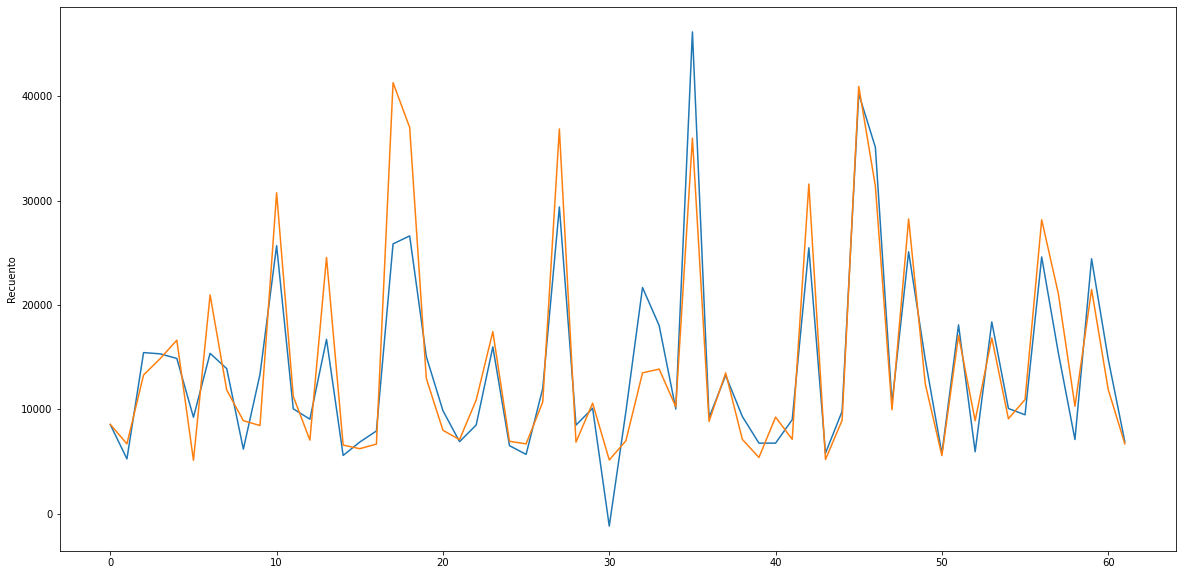

In [ ]:
#Grafico de predicción
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')
plt.ylabel('Recuento')

# Ahora con las variables más significativas para predecir el precio del carro - Ajuste de un modelo de regresión lineal múltiple usando librerias

Pasos para el análisis de regresión múltiple:

1. Preparar los datos.
2. Análisis Exploratorio de Datos (AED).
3. Evaluar las correlaciones.
4. Ajuste del modelo con datos de entrenamiento.
5. Credibilidad del modelo con datos de prueba


**Tarea:** Realizar el AED.

In [ ]:
df4 = df2[['price','enginesize','curbweight','horsepower']]
print(df4)

       price  enginesize  curbweight  horsepower
0    13495.0         130        2548         111
1    16500.0         130        2548         111
2    16500.0         152        2823         154
3    13950.0         109        2337         102
4    17450.0         136        2824         115
..       ...         ...         ...         ...
200  16845.0         141        2952         114
201  19045.0         141        3049         160
202  21485.0         173        3012         134
203  22470.0         145        3217         106
204  22625.0         141        3062         114

[205 rows x 4 columns]


In [ ]:
#2. Evaluar las correlaciones
matriz_corr = df4.corr()
matriz_corr

,price,enginesize,curbweight,horsepower
price,1.000000,0.874145,0.835305,0.808139
enginesize,0.874145,1.000000,0.850594,0.809769
curbweight,0.835305,0.850594,1.000000,0.750739
horsepower,0.808139,0.809769,0.750739,1.000000


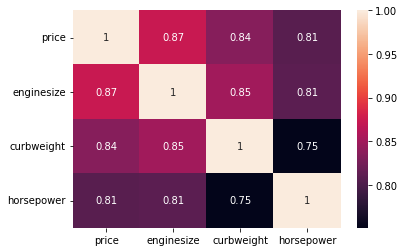

In [ ]:
#Grafica de la matriz de correlaciones
sns.heatmap(matriz_corr, annot=True);

In [ ]:
#Importar métodos para regresión lineal de la libreria sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Definir el dataframe de variable predictoras y variable respuesta
X = df4.drop(
    labels=["price"], axis=1)
Y = df4['price']
print(X)
print(Y)

     enginesize  curbweight  horsepower
0           130        2548         111
1           130        2548         111
2           152        2823         154
3           109        2337         102
4           136        2824         115
..          ...         ...         ...
200         141        2952         114
201         141        3049         160
202         173        3012         134
203         145        3217         106
204         141        3062         114

[205 rows x 3 columns]
0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [ ]:
#Definir datos de entrenamiento y datos de prueba (30%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
#3. Ajuste del modelo con datos de prueba
linear_model = LinearRegression().fit(x_train, y_train)

In [ ]:
print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))

Puntaje Entrenamiento:  0.7934536110390586


In [ ]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

curbweight     4.347386
horsepower    58.072788
enginesize    75.942922
dtype: float64


In [ ]:
y_pred = linear_model.predict(x_test)
y_pred

array([ 4121.69601462,  7462.59723367, 14649.9666964 , 15565.98121208,
       18623.46206815,  7384.3442942 , 11587.06903347,  7327.82828236,
       11945.29730625,  8048.69074403,  6555.4574936 , 37682.30728609,
        5925.67453714, 18862.56827208, 17339.88892321,  8147.79030961,
        5986.81058354, 27787.17193939, 10026.24174371,  6299.54969238,
        7740.82990734, 10016.04813913, 15500.77042919, 18681.69486148,
        6506.92565874, 33426.36656965, 12820.17739451, 25658.36039593,
        5591.19850067, 12747.22390363, 17409.27267514, 17849.6274445 ,
        9755.95824838, 19410.89356404, 16813.42262049,  5959.86567653,
       15439.95702956,  6038.70656081, 14766.11227302,  6436.49160026,
       12597.27572256, 14527.00606908, 10735.73471117,  8940.63684288,
       14218.88023145,  5771.47867548,  5728.00482022,  9136.26919155,
       19139.8415317 , 19170.27323038, 15935.31545052,  5773.78869276,
       29682.83849911,  8147.79030961, 16274.60505283,  9268.75783324,
      

In [ ]:
#y_pred
#print(type(y_pred))
#y_test = y_test.to_numpy() 
#print(type(y_test))
#print(y_test)

In [ ]:
#Importar métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8544556383501688


In [ ]:
from sklearn.metrics import mean_squared_error
ecm = mean_squared_error(y_test, y_pred)
print(ecm)

9450361.071664654


In [ ]:
#Raíz del Error Cuadrático Medio (RECM)
recm = math.sqrt(ecm)
print(recm)

3074.143957537554


In [ ]:
#Error Absoluto Medio
eam = mean_absolute_error(y_test, y_pred)
print(eam)

2031.1195765610546


Text(0, 0.5, 'Recuento')

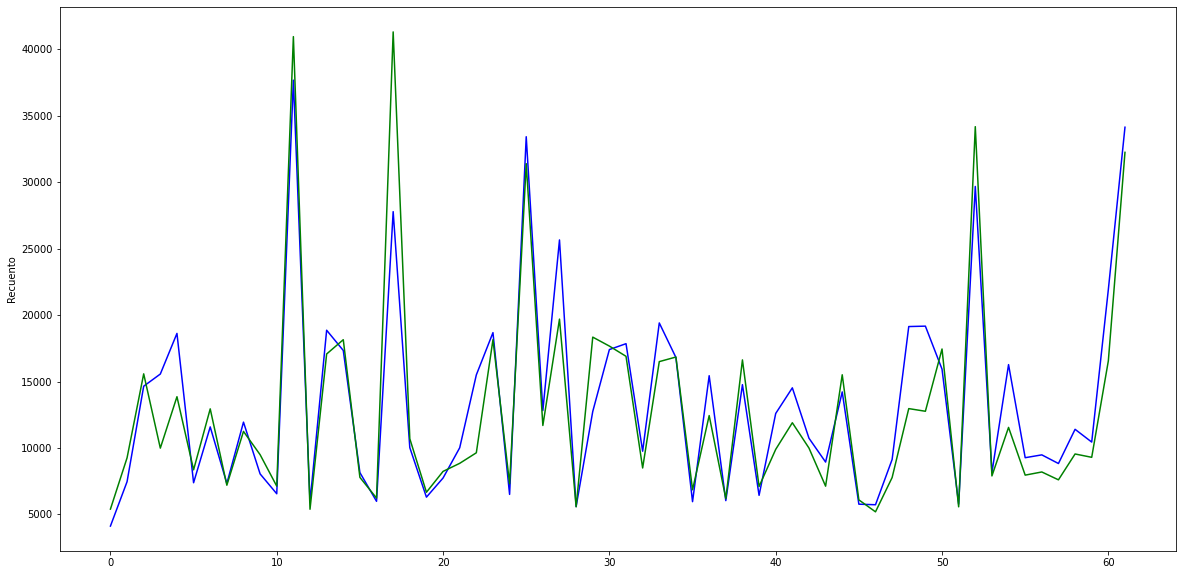

In [ ]:
#Grafico de predicción
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion', color='blue')
plt.plot(y_test.values, label='Real', color='green')
plt.ylabel('Recuento')